<h1><font color="darkblue">Trees</font></h1>

- Recursive data structures

> **Recursion**<br/>
> To know recursion, you must first know recursion.

> **Recursive Acronyms** <br/>
>   GNU: GNU is Not Unix <br/>
>   LAME: LAME Ain't an MP3 Encoder<br/>
>   PIP: PIP Installs Packages

- Used everywhere

> Searches, decisions, etc...


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# factorial using recursion
def f(n):
    if n>0: return n * f(n-1)
    else: return 1

In [3]:
f(5)

120

In [4]:
func = np.vectorize(f)
func([4,5,2])

array([ 24, 120,   2])

### Binary Tree
- Connected nodes - special tree structures

> There is one root node

> Every node has maximum two nodes (left, right)

> Leaves are the terminal nodes

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/Binary_tree.svg" alt="Binary tree.svg" height="250" width="200" align=left>
<!--
<img src="files/Binary_tree.svg" alt="Binary tree.svg" height="250" width="200" align=left>
-->

In [5]:
class node(object):
    
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
   
    def __repr__(self, i=0):
        s = '\t'*i + '[' + repr(self.data) + '] \n'
        if self.left is not None:  
            s += self.left.__repr__(i+1)
        if self.right: # same thing
            s += self.right.__repr__(i+1)
        return s
    
    def search(self, n):
        if self.search_sub(n):
            return "Found number "+str(n)
        else:
            return "Didn't found number "+str(n)
        
        
    def search_sub(self, n):
        if self is None:
            return False
        if (self.data == n):
            return True
        
        result_left, result_right = False, False
        if self.left is not None:
            result_left = self.left.search_sub(n)
        if self.right is not None:
            result_right = self.right.search_sub(n)
        
        return result_left or result_right

In [6]:
root = node(2, 
            node(7,
                 node(2), 
                 node(6, node(5), node(11))),
            node(5, None,
                 node(9, node(4)))
           )

root

[2] 
	[7] 
		[2] 
		[6] 
			[5] 
			[11] 
	[5] 
		[9] 
			[4] 

In [7]:
print (root.left.left.data)

2


In [8]:
root.left.left.left = node(99)
root.left.left.right = node(999)
root

[2] 
	[7] 
		[2] 
			[99] 
			[999] 
		[6] 
			[5] 
			[11] 
	[5] 
		[9] 
			[4] 

In [9]:
root.right.right.data

9

In [10]:
print(root.search(100))

Didn't found number 100


### $n$-ary Tree

In [11]:
class node(object):
    
    def __init__(self, data, children=[]):
        self.data = data
        self.children = children
        
    def __repr__(self, i=0):
        s = '\t'*i + repr(self.data) + '\n' 
        for child in self.children:
            s += child.__repr__(i+1)
        return s

In [12]:
# build a tree
root = node(2, [ 
            node(7, [
                node(2),
                node(6, [
                        node(5), 
                        node(11)])]),
            node(5, [
                node(9, [node(4)])])
            ]);

root

2
	7
		2
		6
			5
			11
	5
		9
			4

In [13]:
root.children.append(node(999))
root

2
	7
		2
		6
			5
			11
	5
		9
			4
	999

### Trees are everywhere!

- Searching

> $k$d-trees, B-tree, R-tree, ball trees, etc...

> E.g., for nearest neighbor searches

- Decisions 

> E.g., for classification 

### $k$-d tree

- Balanced tree
- Split along axes

Constructed from points, see Figure from Wikipedia<br/>
{ (2,3), (5,4), (9,6), (4,7), (8,1), (7,2) }

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Kdtree_2d.svg/1200px-Kdtree_2d.svg.png" alt="Kdtree 2d.svg" width=300 align=left> 
<!--
<img src="files/1200px-Kdtree_2d.svg.png" alt="Kdtree 2d.svg" width=300 align=left> 
-->



##### <h1><font color="darkblue">Decision Tree</font></h1>

- Recursive partitioning of the training dataset

> At a given node with dataset $D$ we look for the
> best split 

> $\theta = $ (feature $j$, threshold $t$) 

> such that the 
> partitions $D_{\textrm{left}}(\theta)$ and $D_{\textrm{right}}(\theta)$ have minimal *impurity*

> $\displaystyle I(\theta) = \frac{n_{\textrm{left}}}{n}\, H\Big(D_{\textrm{left}}(\theta)\Big) + \frac{n_{\textrm{right}}}{n}\,H\Big(D_{\textrm{right}}(\theta)\Big)$

- Different impurity functions $H(\cdot)$

> E.g., Gini with $K$ classes in the partition $D$

>$\displaystyle H(D) = \sum_{i=1}^K p_i (1-p_i)$

> Or variance for regression


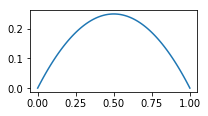

In [14]:
x = np.linspace(0,1,100)
plt.figure(figsize=(3,1.5)); plt.plot(x, x*(1-x));

### Toy Example

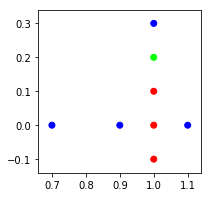

In [15]:
X = np.array([[.7,0],[1,.3],[1.1,0],[.9,0],[1,0],[1,-.1],[1,.1],[1,.2]],
             dtype=np.float)
c = np.array([ 0,0,0,0, 1,1,1, 2], dtype=np.float)
plt.figure(figsize=(3,3))
plt.subplot(111,aspect='equal'); plt.scatter(X[:,0],X[:,1],c=c,cmap='brg');

### Gini impurity of a partition

- We have 3 classes total hence the sum for the entire dataset is

>$ \displaystyle H = \frac{4}{8}\left(1\!-\!\frac{4}{8}\right) 
     + \frac{3}{8}\left(1\!-\!\frac{3}{8}\right) 
     + \frac{1}{8}\left(1\!-\!\frac{1}{8}\right) $ $ \displaystyle = \frac{16}{64}
     + \frac{15}{64}
     + \frac{7}{64}
     = \frac{19}{32} = 0.59375$
     
- This is the root of the tree

### Impurity of 2 partitions after first split

- The root partition contains 3 classes hence the sum is

>$ \displaystyle H_{\rm{}left} = \frac{2}{2}\left(1\!-\!\frac{2}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right)= 0$

>$ \displaystyle H_{\rm{}right} = \frac{3}{6}\left(1\!-\!\frac{3}{6}\right) 
     + \frac{2}{6}\left(1\!-\!\frac{2}{6}\right) 
     + \frac{1}{6}\left(1\!-\!\frac{1}{6}\right) $ 
 $ \displaystyle = \frac{9}{36}
     + \frac{8}{36}
     + \frac{5}{36}
     = \frac{11}{18} $ $\approx 0.61111111$

> Cf. numbers above

- Note importance of weighting by partition sizes!

     
### Impurity of partitions after second split
- Threshhold: 0 on feature -2. Dummy variable means no further split on this partition.
>$ \displaystyle H_{\rm{}root.left.left} = None$<br>
>$ \displaystyle H_{\rm{}root.left.right} = None$
- Threshhold: 0.15 on feature 1
>$ \displaystyle H_{\rm{}root.right.left} = \frac{3}{4}\left(1\!-\!\frac{3}{4}\right) 
     + \frac{1}{4}\left(1\!-\!\frac{1}{4}\right) 
     + \frac{0}{4}\left(1\!-\!\frac{0}{4}\right) $ 
 $ \displaystyle = \frac{3}{16}
     + \frac{3}{16}
     + \frac{0}{16}
     = \frac{6}{16} $ $= 0.375$<br>
>$ \displaystyle H_{\rm{}root.right.right} = \frac{1}{2}\left(1\!-\!\frac{1}{2}\right) 
     + \frac{1}{2}\left(1\!-\!\frac{1}{2}\right) 
     + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right) $ 
 $ \displaystyle = \frac{1}{4}
     + \frac{1}{4}
     + \frac{0}{4}
     = \frac{1}{2} $ $= 0.5$

### And so on
### Check answer below

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X,c)

print (clf.tree_.n_node_samples)
print (clf.tree_.impurity)
print (clf.tree_.feature)
print (clf.tree_.threshold)

[8 2 6 4 2]
[0.59375    0.         0.61111111 0.375      0.5       ]
[ 0 -2  1 -2 -2]
[ 0.94999999 -2.          0.15       -2.         -2.        ]


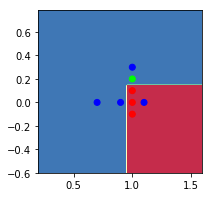

In [24]:
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))
grid = np.c_[x.ravel(),y.ravel()]

# decision-surfaces as fn of max depth
clf = tree.DecisionTreeClassifier(max_depth=2)
z = clf.fit(X,c).predict(grid).reshape(x.shape)
plt.figure(figsize=(3,3)); plt.subplot(111,aspect='equal')
plt.contourf(x, y, z, cmap='Spectral_r')
plt.scatter(X[:,0], X[:,1], c=c, cmap='brg');

# Advantages and disadvantages for decision tree classifier

### Advantages  
Advantage 1: Decision trees implicitly perform variable screening or feature selection       
Advantage 2: Decision trees require relatively little effort from users for data preparation   
Advantage 3: Nonlinear relationships between parameters do not affect tree performance   
Advantage 4: The best feature of using trees for analytics - easy to interpret and explain to executives!
    
### Disadvantages
1.Instability:     
The reliability of the information in the decision tree depends on feeding the precise internal and external information at the onset. Even a small change in input data can at times, cause large changes in the tree.      

2.Unwieldy:               
Decision trees, while providing easy to view illustrations, can also be unwieldy. Even data that is perfectly divided into classes and uses only simple threshold tests may require a large decision tree. Large trees are not intelligible, and pose presentation difficulties.

### Example

Use the sklearn routines to 

- Load the iris dataset and use the first 2 features
- Run the decision tree classifier with different depths
- Use cross-validation and plot the results

In [25]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] # only first 2 features
c = iris.target[:] # copy
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

print ('New classes:', np.unique(c))
print ('New data:', X.shape)

New classes: [0 1]
New data: (100, 2)


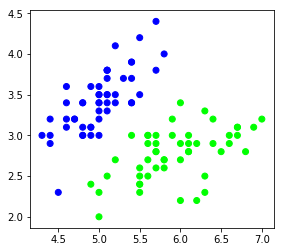

In [26]:
plt.subplot(111,aspect='equal'); 
plt.scatter(X[:,0],X[:,1],c=c,cmap='brg');

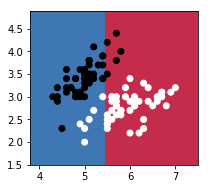

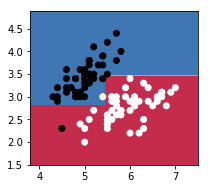

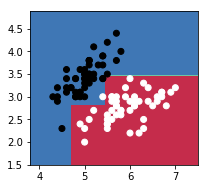

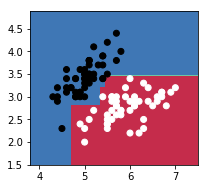

In [27]:
# grid of points within the limits
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))
grid = np.c_[x.ravel(),y.ravel()]

# decision-surfaces as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    z = clf.fit(X,c).predict(grid).reshape(x.shape)
    plt.figure(figsize=(3,3)); plt.subplot(111,aspect='equal')
    plt.contourf(x, y, z, cmap='Spectral_r')
    plt.scatter(X[:,0], X[:,1], c=c, cmap='gray');

In [28]:
# k-fold cross-validation 
from sklearn.model_selection import cross_val_score, KFold
clf = tree.DecisionTreeClassifier(max_depth=1)
cross_val_score(clf, X,c, cv=10)

array([1. , 0.8, 0.8, 0.8, 1. , 1. , 0.8, 0.9, 0.9, 0.9])

In [29]:
# also by hand
k_fold = KFold(n_splits=10,shuffle=True,random_state=42) 
for k, (train, test) in enumerate(k_fold.split(X)):
    cpred = clf.fit(X[train],c[train]).predict(X[test])
    print (k, ':\t', (c[test]==cpred).sum() / float(test.size),
        '\t=', clf.score(X[test],c[test]) )

0 :	 1.0 	= 1.0
1 :	 0.8 	= 0.8
2 :	 0.9 	= 0.9
3 :	 0.9 	= 0.9
4 :	 1.0 	= 1.0
5 :	 0.9 	= 0.9
6 :	 1.0 	= 1.0
7 :	 0.7 	= 0.7
8 :	 0.9 	= 0.9
9 :	 0.8 	= 0.8


In [46]:
# quality as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    s = cross_val_score(clf, X,c, cv=20)
    ## fix the comparisons?
    print (depth, s.mean(), s.std())

1 0.8875 0.1186585905491512
2 0.95 0.1274754878398196
3 0.95 0.1274754878398196
4 0.95 0.1274754878398196


In [45]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10,shuffle=True,random_state=42) 

scores = dict() # store the cv score of each split
for train, test in k_fold.split(X):
    for depth in range(1,5):
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        clf.fit(X[train],c[train])
        score = clf.score(X[test],c[test])
        if depth not in scores: scores[depth] = [] # empty 
        scores[depth].append(score) # list for this depth

for depth in scores:
    s = np.array(scores[depth])
    print (depth, s.mean(), s.std(), s.min())

1 0.89 0.09433981132056604 0.7
2 0.95 0.06708203932499368 0.8
3 0.95 0.06708203932499368 0.8
4 0.95 0.06708203932499368 0.8


# <h1><font color="darkblue">Random Forest</font></h1>

### Random Tree

- Hard to pick the *best* in high dimensions (i.e., very expensive)

> Instead we pick a number of random directions to search<br/>
> and take the optimal split among those

- A randomized tree will not be optimal but much faster to build

We assume that the user knows about the construction of single classification trees. Random Forests grows many classification trees. To classify a new object from an input vector, put the input vector down each of the trees in the forest. Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes (over all the trees in the forest). 

####  forest error rate 
it was shown that the forest error rate depends on two things:      
(1)The correlation between any two trees in the forest. Increasing the correlation increases the forest error rate.     
(2)The strength of each individual tree in the forest. A tree with a low error rate is a strong classifier. Increasing the strength of the individual trees decreases the forest error rate.    
Reducing m reduces both the correlation and the strength. Increasing it increases both. Somewhere in between is an "optimal" range of m - usually quite wide.    

#### No need for cross-validation 
 In random forests, there is no need for cross-validation or a separate test set to get an unbiased estimate of the test set error. It is estimated internally. At the end of the run, take j to be the class that got most of the votes every time case n was oob. The proportion of times that j is not equal to the true class of n averaged over all cases is the oob error estimate. This has proven to be unbiased in many tests.
#### Balancing prediction error
In some data sets, the prediction error between classes is highly unbalanced. Some classes have a low prediction error, others a high. This occurs usually when one class is much larger than another. Then random forests, trying to minimize overall error rate, will keep the error rate low on the large class while letting the smaller classes have a larger error rate.   

The error can balancing can be done by setting different weights for the classes.     

The higher the weight a class is given, the more its error rate is decreased. A guide as to what weights to give is to make them inversely proportional to the class populations. 

#### Compare with Decision Tree
##### Advantage
Random forests overcome several problems with decision trees, including:     
•Reduction in overfitting: by averaging several trees, there is a significantly lower risk of overfitting.     
•Less variance: By using multiple trees, you reduce the chance of stumbling across a classifier that doesn’t perform well because of the relationship between the train and test data.     
As a consequence, in almost all cases, random forests are more accurate than decision trees.   

##### Disadvantage
There are many disadvantages of using a random forest over a simple decision tree:     
•It’s more complex.     
•It’s hard to visualize the model or understand why it predicted something.    
•It’s more difficult to implement.       
•It’s more computationally expensive.  

Text(0.5, 0, 'Relative Importance')

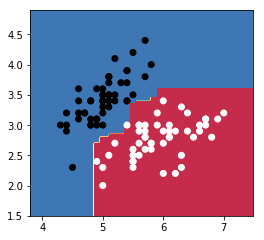

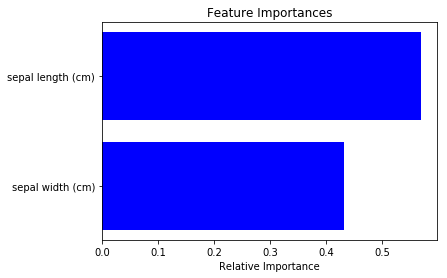

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Load dataset
iris = datasets.load_iris()
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]


# grid of points within the limits to evaluate
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))
grid = np.c_[x.ravel(),y.ravel()]


# Fit random forest classifier
clf = RandomForestClassifier(n_estimators=200,max_depth=2)
z = clf.fit(X,c).predict(grid).reshape(x.shape)

# Plot the result
plt.figure(figsize=(4,4)); plt.subplot(111,aspect='equal')
plt.contourf(x,y,z, cmap='Spectral_r')
plt.scatter(X[:,0],X[:,1], c=c, cmap='gray');

# No need, but no harm done doing so
cross_val_score(clf, X,c, cv=10)


# Random forest generate feature importance
importances =clf.feature_importances_
indices = np.argsort(importances)
plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), np.array(iris.feature_names)[np.argsort(importances)])
plt.xlabel('Relative Importance')